# Expansión Térmica del Material (Nitinol)

El objetivo de la función es calcular la expansión del material (como el Nitinol) en función de la temperatura, teniendo en cuenta el cambio de fase entre **martensita** y **austenita**.

## Fórmulas utilizadas

### 1. Expansión Térmica en Martensita (Antes de $A_s$):

La fórmula básica de expansión térmica es:

$$
D(T) = D_{\text{inicial}} \times (1 + \alpha_m \times \Delta T)
$$

- $D_{\text{inicial}}$: El diámetro inicial o longitud del material a temperatura baja ($T_{\text{min}}$).
- $\alpha_m$: Coeficiente de expansión térmica en martensita.
- $\Delta T$: Diferencia de temperatura ($T - T_{\text{min}}$).

**¿Qué significa?**
En este caso, cuando la temperatura es menor que la temperatura de inicio de transformación $A_s$, el material sigue siendo completamente martensita. Aquí, la expansión es lineal y solo depende de la temperatura.

### 2. Expansión Térmica en la Transición de Fase (Entre $A_s$ y $A_f$):

En este rango de temperaturas, el material está en transición entre martensita y austenita. Aquí utilizamos una **curva de transformación** que depende de cómo varía la fase entre $A_s$ y $A_f$:

$$
\text{fracción transformada} = \frac{1}{2} \times \left(1 - \cos \left( \pi \times f \right)\right)
$$

donde:

$$
f = \frac{T - A_s}{A_f - A_s}
$$

- $f$: Fracción de la transformación de fase, que varía de 0 (todo martensita) a 1 (todo austenita).
- $\text{fracción transformada}$: Cómo cambia el volumen del material a medida que pasa de martensita a austenita.

El término de expansión térmica se calcula como:

$$
\text{expansión térmica} = (1 + \alpha_m \times \Delta T_1) \times (1 + \alpha_a \times \Delta T_2)
$$

donde:
- $\Delta T_1$: Diferencia de temperatura entre $T_{\text{min}}$ y $A_s$.
- $\Delta T_2$: Diferencia de temperatura entre $A_s$ y $T$.
- $\alpha_a$: Coeficiente de expansión térmica en la fase austenita.

**¿Qué significa?**
En este intervalo de temperaturas, la expansión térmica no es solo una función de la temperatura, sino que también depende de cuánto se ha transformado el material de martensita a austenita. A medida que más material se convierte en austenita, su expansión será mayor debido a su mayor coeficiente de expansión térmica.

### 3. Expansión Térmica en Austenita Completa (Después de $A_f$):

Cuando la temperatura supera $A_f$, todo el material ha cambiado a austenita. La expansión térmica es completamente determinada por el coeficiente de expansión térmica $\alpha_a$ de la fase austenita:

$$
D(T) = D_{\text{inicial}} \times (1 + \alpha_m \times \Delta T_1) \times (1 + \alpha_a \times \Delta T_2) \times (1 + 1)
$$

Aquí, la fracción transformada es igual a 1 (es decir, el material es completamente austenita).

**¿Qué significa?**
Una vez que el material ha alcanzado el 100% de austenita, la expansión térmica se comporta como si fuera un material homogéneo con coeficiente de expansión $\alpha_a$, y el material sigue expandiéndose a medida que sube la temperatura.

## Cálculo Final:

Para cada temperatura $T$ entre $T_{\text{min}}$ y $T_{\text{max}}$, calculamos el valor de $D(T)$, que nos da el diámetro (o longitud) del material en función de la temperatura.

- **Antes de $A_s$**: Solo depende de $\alpha_m$.
- **Entre $A_s$ y $A_f$**: Depende de la fase martensita y de la fracción transformada.
- **Después de $A_f$**: Solo depende de $\alpha_a$, y el material está completamente transformado en austenita.

## Visualización y Resultados:

Una vez que se calcula $D(T)$ para todo el rango de temperaturas, mostramos un gráfico de la expansión térmica. En este gráfico:
- La línea **roja** indica la temperatura de $37^\circ$C, para mostrar el valor de $D$ a esa temperatura.
- La **zona sombreada** en gris muestra el rango de transición de fase, donde el material cambia de martensita a austenita.
- Los gráficos de **diámetro** y **longitud** se visualizan con líneas de colores diferentes (azul para diámetro y verde para longitud), permitiendo comparar cómo se comporta el material en función de la temperatura.

## ¿Qué pasa en el gráfico?
- En el gráfico, puedes observar cómo el material se expande y cómo el cambio de fase afecta la expansión térmica. 
- En temperaturas menores a $A_s$, el material sigue siendo martensita y su expansión es menor.
- Al entrar en el rango de transición de fase (entre $A_s$ y $A_f$), la expansión aumenta debido a la mezcla de fases martensita y austenita.
- Después de $A_f$, el material está completamente austenita, y su expansión térmica sigue un comportamiento más homogéneo y predecible.

## Resumen de lo que hace el código:
1. Calcula la expansión térmica en función de la temperatura y las transiciones de fase.
2. Muestra el gráfico con las líneas correspondientes y resalta la zona de transición de fase.
3. Permite observar cómo varía el diámetro o la longitud del material con la temperatura.

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Función general
def expansion(tipo, T_min, T_max, D_inicial, As, Af, alpha_m, alpha_a):
    
    T = np.linspace(T_min, T_max, 500)
    D = np.zeros_like(T)

    for i, temp in enumerate(T):
        if temp < As:
            delta_T = temp - T_min
            # Expansión en martensita
            D[i] = D_inicial * (1 + alpha_m * delta_T)
        elif As <= temp <= Af:
            # En la transición de fase
            f = (temp - As) / (Af - As)
            fraccion_transformada = 0.5 * (1 - np.cos(np.pi * f))  # Curva de transformación
            delta_T1 = As - T_min
            delta_T2 = temp - As
            expansion_termica = (1 + alpha_m * delta_T1) * (1 + alpha_a * delta_T2)
            D[i] = D_inicial * expansion_termica * (1 + fraccion_transformada)
        else:
            # Expansión en austenita completa
            delta_T1 = As - T_min
            delta_T2 = temp - As
            expansion_termica = (1 + alpha_m * delta_T1) * (1 + alpha_a * delta_T2)
            fraccion_transformada = 1  # 100% transformado
            D[i] = D_inicial * expansion_termica * (1 + fraccion_transformada)

    # Configurar el color de la línea según el tipo
    if tipo == "diámetro":
        color_linea = 'blue'
    elif tipo == "longitud":
        color_linea = 'green'
    else:
        color_linea = 'black'  # Color por defecto

    
    # Mostrar gráfico
    plt.figure(figsize=(9, 5))
    plt.plot(T, D, label=f'{tipo.capitalize()} inicial = {D_inicial} mm', color=color_linea)
    plt.axvline(37, color='red', linestyle='--', label=f'37°C = {D[np.abs(T - 37).argmin()]:.4f} mm')
    plt.axvspan(As, Af, color='gray', alpha=0.2, label='Rango de transición')
    plt.title(f'Expansión del stent de Nitinol - {tipo.capitalize()}')
    plt.xlabel('Temperatura (°C)')
    plt.ylabel(f'{tipo.capitalize()} (mm)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

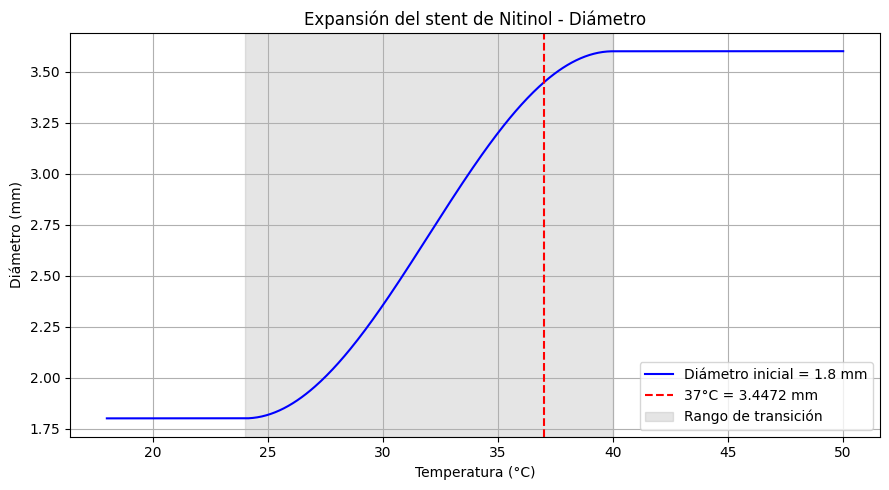

In [5]:
# Llamada a la función para el diámetro
expansion(tipo="diámetro", T_min=18, T_max=50, D_inicial=1.8, As=24.00, Af=40.00, alpha_m=6.6e-6, alpha_a=11e-6)

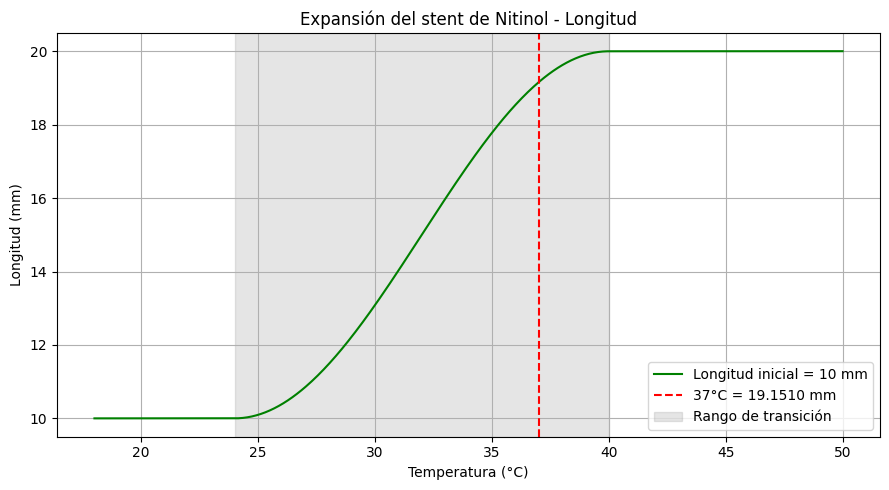

In [6]:
# Llamada a la función para la longitud
expansion(tipo="longitud", T_min=18, T_max=50, D_inicial=10, As=24.00, Af=40.00, alpha_m=6.6e-6, alpha_a=11e-6)


## Evaluación del Flujo Sanguíneo en el Stent

### Objetivo
El objetivo es analizar cómo varía el flujo sanguíneo a través del stent en diferentes condiciones fisiológicas (reposo y actividad), utilizando el modelo de Poiseuille para flujo laminar en un tubo cilíndrico. Se calculan variables como la caída de presión, velocidad promedio, velocidad máxima y perfil de velocidades a lo largo del radio del stent.

---

### Fundamento Teórico

#### Flujo Laminar de Poiseuille
El flujo de Poiseuille describe el comportamiento del líquido viscoso en una tubería cilíndrica bajo condiciones de flujo laminar. Es aplicable en vasos sanguíneos y stents cuando el flujo no es turbulento. La ecuación que rige este flujo es:

$$
Q = \frac{\pi \cdot R^4 \cdot \Delta P}{8 \cdot \mu \cdot L}
$$

Donde:

- \( Q \): Caudal o flujo volumétrico (m³/s)  
- \( R \): Radio del tubo (m)  
- \( $\Delta$ P \): Caída de presión (Pa)  
- \( $\mu$ \): Viscosidad dinámica de la sangre (Pa·s)  
- \( L \): Longitud del tubo o stent (m)

A partir de esta ecuación, se puede aislar la caída de presión como:

$$
\Delta P = \frac{8 \cdot \mu \cdot L \cdot Q}{\pi \cdot R^4}
$$

---

### Perfil de Velocidad

La distribución de velocidades dentro del stent sigue un perfil parabólico:

$$
v(r) = v_{\text{max}} \cdot \left(1 - \frac{r^2}{R^2} \right)
$$

Donde:

- \( v(r) \): Velocidad en un punto del radio \( r \)  
- \( v_${\text{max}}$ \): Velocidad máxima en el centro (r = 0)  
- \( R \): Radio del stent  
- \( r \): Distancia desde el centro del stent

La **velocidad promedio** se relaciona con la máxima como:

$$
v_{\text{prom}} = \frac{v_{\text{max}}}{2}
$$

---

### Condiciones Analizadas

Se ha considerado que el stent va a ser implantado en arterias coronarias.

#### 1. En Reposo 
- **Flujo coronario típico**: 200ml/min 
- **Caudal total**:  
  $$
    Q = \frac{200 \, \text{ml}}{1 \, \text{min}} \times \frac{1 \times 10^{-6} \, \text{m}^3}{1 \, \text{ml}} \times \frac{1 \, \text{min}}{60 \, \text{s}} = \frac{200 \times 10^{-6}}{60} \, \text{m}^3/\text{s} = 3.33 \times 10^{-6} \, \text{m}^3/\text{s}
$$
- Se espera una velocidad promedio baja y una caída de presión menor.  
- El perfil de velocidades muestra un flujo más lento y uniforme.

#### 2. En Actividad
- **Flujo coronario típico**:1000ml/min  
- **Caudal total**:  
  $$
    Q = \frac{1000 \, \text{ml}}{1 \, \text{min}} \times \frac{1 \times 10^{-6} \, \text{m}^3}{1 \, \text{ml}} \times \frac{1 \, \text{min}}{60 \, \text{s}} = \frac{1000 \times 10^{-6}}{60} \, \text{m}^3/\text{s} = 16.67 \times 10^{-6} \, \text{m}^3/\text{s}
    $$ 
- Se espera una mayor velocidad promedio y una caída de presión más pronunciada.  
- El perfil de velocidades se ensancha y la velocidad máxima aumenta considerablemente.

---

### Cálculo de FFR e iFR

#### Índice de Reserva Fraccional (FFR) o Índice de Reserva Instantánea (iFR)

El **FFR** se utiliza para medir la caída de presión a través de una arteria coronaria en relación con la presión a nivel de la entrada (presión sistólica). El FFR se calcula como la relación entre la presión distal (presión después del stent) y la presión proximal (presión de entrada).

El **iFR** es un índice similar al FFR, pero se mide a través de la **presión en reposo** en lugar de durante la vasodilatación inducida por medicamentos. El iFR se calcula de la **misma manera** que el FFR.

$$
FFR = \frac{P_{\text{salida}}}{P_{\text{entrada}}}
$$

Donde:
- \( P_${\text{salida}}$ \) es la presión en el extremo distal del stent (después del flujo sanguíneo).
- \( P_${\text{entrada}}$ \) es la presión proximal, es decir, la presión antes del stent.

Un valor de **FFR o iFR cercano a 1** indica que no hay estenosis significativa, mientras que un valor **menor de 0.80** puede indicar que el stent no está permitiendo el flujo adecuado debido a la obstrucción.

La diferencia clave es que el iFR se mide sin la necesidad de usar vasodilatadores, por lo que es menos invasivo y más rápido en su medición.

---

### Visualización de Resultados

En ambos casos se genera un gráfico que representa:

- El **perfil de velocidades** a través del radio del stent.
- Se marca:
  - La **velocidad máxima** en el centro (en rojo).
  - La **velocidad cero** en la pared (en verde).
- El eje Y está invertido para que el centro del stent se muestre arriba, imitando un corte transversal desde dentro hacia fuera.

---

### Conclusiones

1. **Caída de presión**: La caída de presión depende directamente del flujo. Al aumentar el flujo (actividad), la resistencia del stent genera una mayor caída de presión.
2. **Perfil de velocidades**: El perfil de velocidades cambia notablemente entre reposo y actividad. En reposo, el flujo es más lento y más uniforme, mientras que en actividad, el flujo se acelera, y la velocidad máxima aumenta significativamente.
3. **Velocidades máximas y mínimas**: El flujo siempre es cero en las paredes del stent y máximo en el centro, como lo indica el perfil parabólico de Poiseuille.
4. **Adaptación de la circulación**: El sistema circulatorio se adapta al esfuerzo físico, aumentando el flujo a través de los vasos, lo que se refleja en la variación de la caída de presión y la velocidad máxima.
5. **FFR e iFR**: Estos índices permiten evaluar la funcionalidad del stent en diferentes condiciones.



In [17]:
# Función para calcular el flujo sanguíneo
def flujo(Q, R_stent, L, mu, P_entrada):
    delta_P = (8 * mu * L * Q) / (np.pi * R_stent**4)  # Caída de presión
    v_prom = Q / (np.pi * R_stent**2)  # Velocidad promedio 
    P_salida = P_entrada - delta_P  # Presión en salida

    # Perfil de velocidades
    total_points = 100
    r = np.linspace(0, R_stent, total_points)
    v = (1 / (4 * mu)) * (-delta_P / L) * (R_stent**2 - r**2)
    v = np.abs(v)  # Asegurar valores positivos

    # Calcular velocidad máxima en el centro
    v_max = np.max(v)

    #Cálcular FFR o iFR
    ffr= P_salida/P_entrada
    plt.figure(figsize=(10, 6))

    # Perfil de velocidad
    plt.plot(v, r * 1000, label='Perfil de velocidad', color='blue')  # r en mm
    
    # Marcar velocidad máxima en el centro
    plt.scatter([v_max], [0], color='red', zorder=5, label="Velocidad máxima (centro)")
    plt.text(v_max + 0.005, 0, f"Max: {v_max:.5f} m/s", color='red')
    
    # Marcar velocidad cero en el borde
    plt.scatter([0], [R_stent * 1000], color='green', zorder=5, label="Velocidad en la pared (borde)")
    plt.text(0.005, R_stent * 1000 + 0.5, "V_borde: 0 m/s", color='green')
    
    # Configurar el gráfico
    plt.xlabel('Velocidad (m/s)')
    plt.ylabel('Radio (mm)')
    
    plt.title('Perfil de Velocidad de Poiseuille en el Stent')
    plt.legend()
    plt.grid(True)
    plt.gca().invert_yaxis()  # Invertir eje Y para que el centro esté arriba
    plt.show()
    return delta_P, v_prom, P_salida, v, r, v_max,ffr 

In [1]:
# Llamada a la función para el reposo
mu = 3.5e-3  # Viscosidad de la sangre (Pa·s)
L = 0.0020  # Longitud del stent (m)
Q = 3.33e-6  # Flujo sanguíneo (m^3/s)
R_stent = 1.775e-3  # Radio del stent (m)
P_entrada = 13332 
delta_P,v_prom,P_salida,v,r,v_max,ffr = flujo(Q, R_stent, L, mu, P_entrada)
print(f"Caída de presión a través del stent: {delta_P:.2f} Pa")
print(f"Velocidad promedio del flujo sanguíneo en el stent: {v_prom:.5f} m/s")
print(f"Presión en la salida del stent: {P_salida:.2f} Pa")
print(f"FFR {ffr:.2f}. Al ser > 0.8, el stent funcionando correctamente ")

NameError: name 'flujo' is not defined

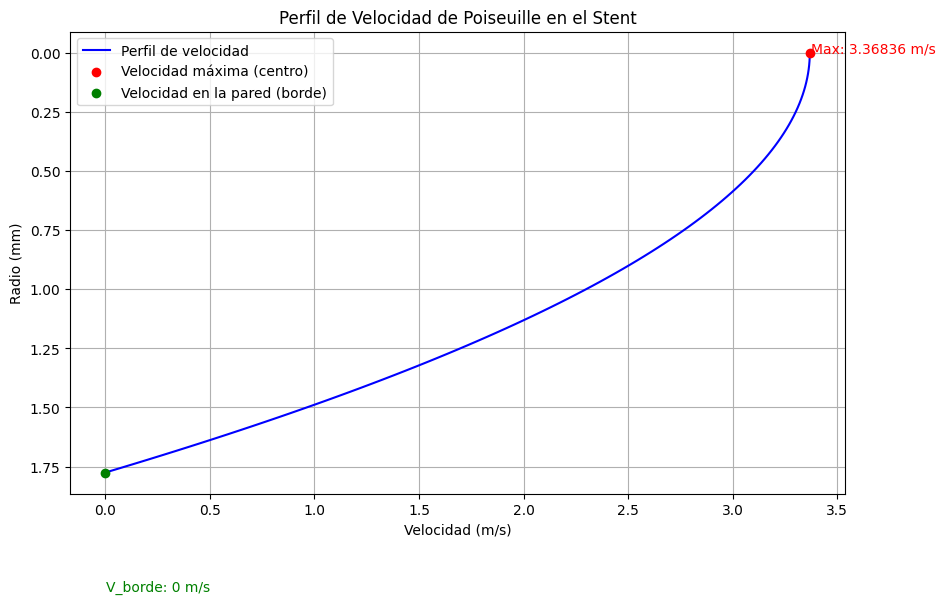

Caída de presión a través del stent: 299.35 Pa
Velocidad promedio del flujo sanguíneo en el stent: 1.68418 m/s
Presión en la salida del stent: 13032.65 Pa
FFR 0.98. Al ser > 0.8, el stent funcionando correctamente 


In [19]:
# Llamada a la función para la actividad
mu = 3.5e-3  # Viscosidad de la sangre (Pa·s)
L = 0.020  # Longitud del stent (m)
Q = 16.67e-6# Flujo sanguíneo (m^3/s)
R_stent = 1.775e-3  # Radio del stent (m)
P_entrada = 13332 
delta_P,v_prom,P_salida,v,r,v_max,ffr = flujo(Q, R_stent, L, mu, P_entrada)
print(f"Caída de presión a través del stent: {delta_P:.2f} Pa")
print(f"Velocidad promedio del flujo sanguíneo en el stent: {v_prom:.5f} m/s")
print(f"Presión en la salida del stent: {P_salida:.2f} Pa")
print(f"FFR {ffr:.2f}. Al ser > 0.8, el stent funcionando correctamente ")

#### Evaluación de la estenosis en el stent

In [20]:
def evaluar_estenosis(Q_reposo, Q_actividad, R_stent_original, L, mu, P_entrada):
    reducciones = [1.0, 0.75, 0.50, 0.3]  # 100%, 75%, 50% del radio original
    colores = ['blue', 'orange', 'red',"purple"]
    etiquetas = ['Sin oculusión ', '25% de oclusión', '50% de oclusión',"75% de oclusión"]
    
    estados = [('Reposo', Q_reposo), ('Actividad', Q_actividad)]
    
    fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
    
    for idx, (estado, Q) in enumerate(estados):
        ax = axs[idx]
        for i, factor in enumerate(reducciones):
            R = R_stent_original * factor
            delta_P = (8 * mu * L * Q) / (np.pi * R**4)
            v_prom = Q / (np.pi * R**2)
            P_salida = P_entrada - delta_P
            ffr = max(P_salida / P_entrada, 0)

            total_points = 100
            r = np.linspace(0, R, total_points)
            v = (1 / (4 * mu)) * (-delta_P / L) * (R**2 - r**2)
            v = np.abs(v)

            ax.plot(v, r * 1000, color=colores[i], label=f"{etiquetas[i]} - FFR: {ffr:.2f}")

        ax.set_title(f"{estado}")
        ax.set_xlabel('Velocidad (m/s)')
        ax.grid(True)
        ax.legend()
        ax.invert_yaxis()

    axs[0].set_ylabel('Radio (mm)')
    fig.suptitle('Impacto de la Estenosis en el Perfil de Velocidad y FFR o iFR (Reposo vs Actividad)', fontsize=14)
    plt.tight_layout()
    plt.show()



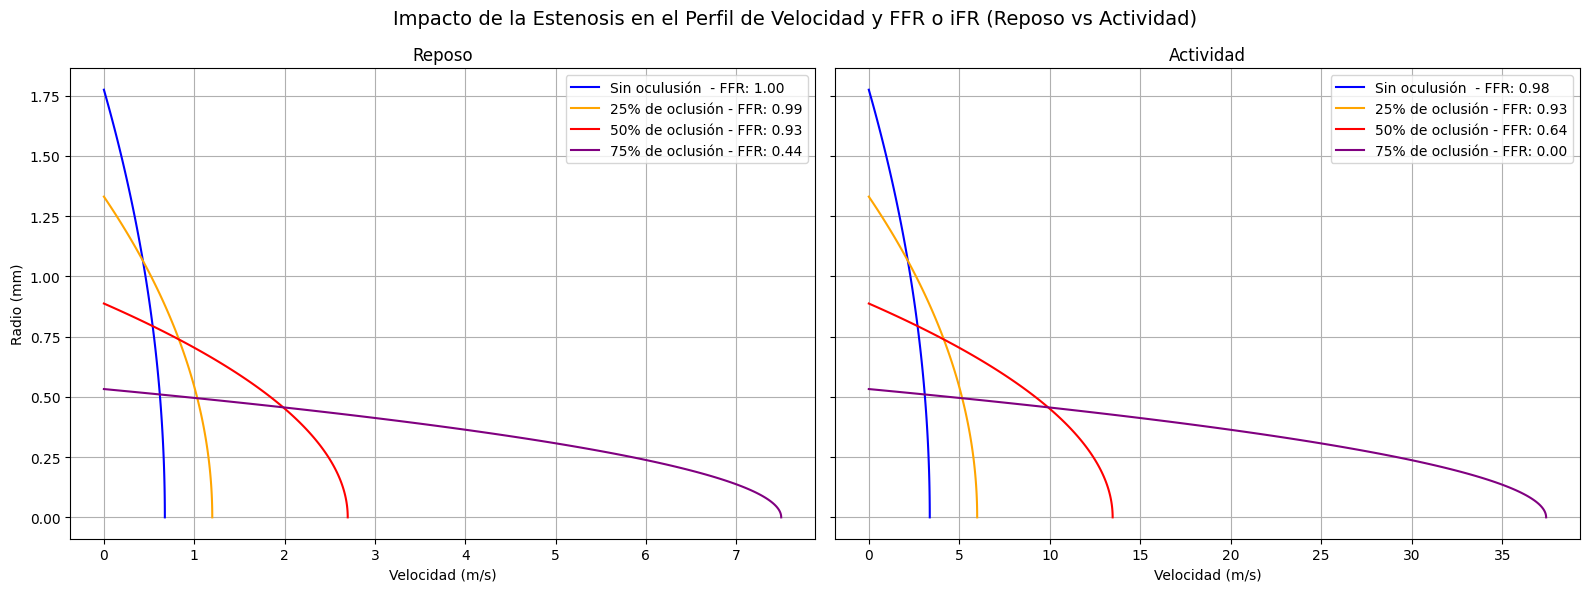

In [21]:
mu = 3.5e-3  # Viscosidad de la sangre (Pa·s)
L = 0.020  # Longitud del stent (m)
Q_rep = 3.34e-6 # Flujo sanguíneo rep (m^3/s)
Q_act = 16.67e-6# Flujo sanguíneo act (m^3/s)
R_stent = 1.775e-3  # Radio del stent (m)
P_entrada = 13332 # Pa (~ mmHg)

# Ejecutar la simulación
evaluar_estenosis(Q_rep,Q_act, R_stent, L, mu, P_entrada)